In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/heart_disease_dataset.csv')

In [3]:
print(df.columns)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [4]:
# Assuming the columns exist in the DataFrame, perform one-hot encoding
X_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset (replace 'your_dataset.csv' with your file)
data = pd.read_csv('/content/drive/MyDrive/heart_disease_dataset.csv')

# Define X (features) and y (target variable)
# Assuming you want to drop certain columns to create X
columns_to_drop = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
X = data.drop(columns_to_drop, axis=1)  # Features (all columns except the ones in 'columns_to_drop')
y = data['HeartDisease']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 1.0
Confusion Matrix:
[[ 77   0]
 [  0 107]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       107

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184



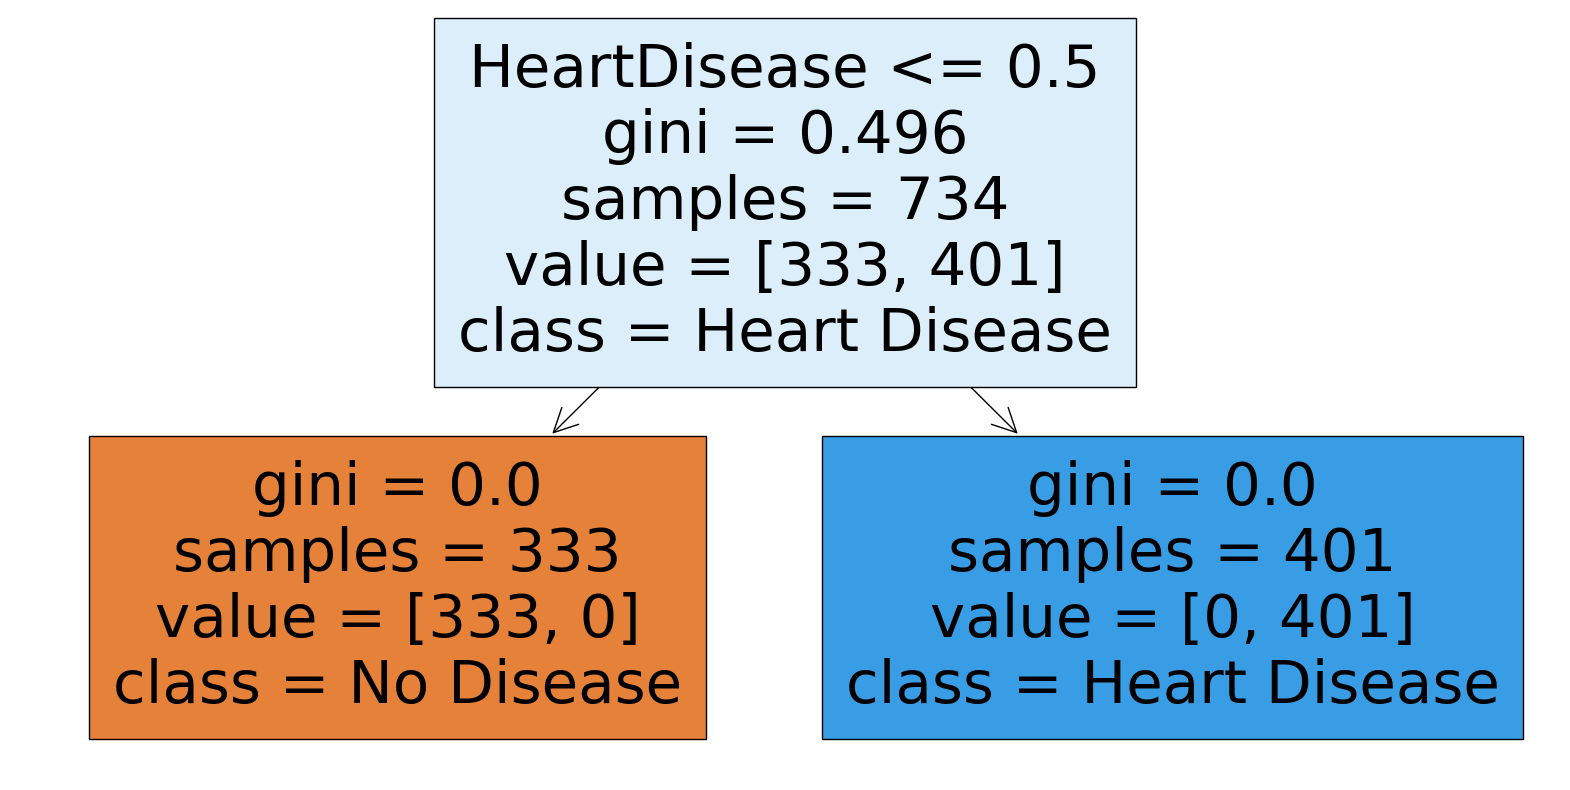

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'clf' is your trained Decision Tree classifier
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Disease', 'Heart Disease'])
plt.show()
